Reducing the network's size - regularization technique

In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
# Now let's try to replace it with this smaller network:

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Let's now compare the validation losses of the original and smaller network.

In [5]:


original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 3s 51ms/step - loss: 0.4541 - acc: 0.8238 - val_loss: 0.3381 - val_acc: 0.8793
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2588 - acc: 0.9100 - val_loss: 0.3063 - val_acc: 0.8761
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2018 - acc: 0.9291 - val_loss: 0.2804 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1672 - acc: 0.9412 - val_loss: 0.2990 - val_acc: 0.8810
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1449 - acc: 0.9488 - val_loss: 0.3398 - val_acc: 0.8714
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1257 - acc: 0.9569 - val_loss: 0.3566 - val_acc: 0.8697
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1097 - acc: 0.9622 - val_loss: 0.3532 - val_acc: 0.8728
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0971 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 2s 48ms/step - loss: 0.6110 - acc: 0.7064 - val_loss: 0.5578 - val_acc: 0.7566
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5047 - acc: 0.8312 - val_loss: 0.4883 - val_acc: 0.8303
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4153 - acc: 0.8869 - val_loss: 0.4049 - val_acc: 0.8705
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3190 - acc: 0.9153 - val_loss: 0.3389 - val_acc: 0.8789
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2505 - acc: 0.9269 - val_loss: 0.3003 - val_acc: 0.8885
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2102 - acc: 0.9342 - val_loss: 0.2866 - val_acc: 0.8895
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1844 - acc: 0.9410 - val_loss: 0.2889 - val_acc: 0.8844
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1664 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

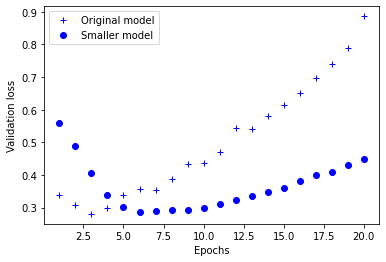

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one and its performance degrades much more slowly once it starts overfitting.

In [9]:
# Let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.4532 - acc: 0.8030 - val_loss: 0.3781 - val_acc: 0.8299
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2214 - acc: 0.9113 - val_loss: 0.2953 - val_acc: 0.8785
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1216 - acc: 0.9544 - val_loss: 0.5024 - val_acc: 0.8390
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0646 - acc: 0.9799 - val_loss: 0.6752 - val_acc: 0.8314
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0609 - acc: 0.9879 - val_loss: 0.5046 - val_acc: 0.8820
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0512 - acc: 0.9938 - val_loss: 2.2577 - val_acc: 0.7177
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0185 - acc: 0.9958 - val_loss: 0.7080 - val_acc: 0.8802
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0862 - a

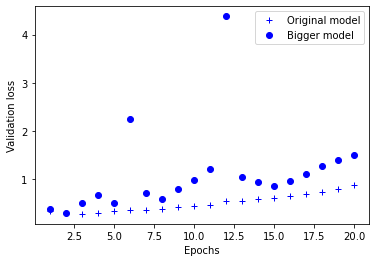

In [11]:
# Here's how the bigger network compares to the original one.

bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


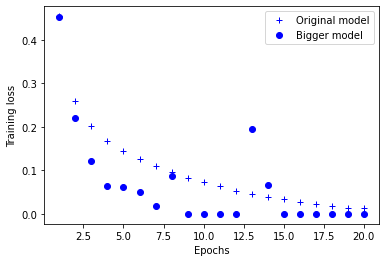

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).
